# Loading Multimodal Data

In [2]:
!cp /content/drive/MyDrive/Multimodal/load_multimodal_tabular_data.py .
!cp /content/drive/MyDrive/Multimodal/layer_utils.py .
!cp /content/drive/MyDrive/Multimodal/tabular_combiner.py .
!cp /content/drive/MyDrive/Multimodal/tabular_modeling_auto.py .
!cp /content/drive/MyDrive/Multimodal/tabular_transformers.py .

In [3]:
!pip install transformers==3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 884 kB 31.7 MB/s 
     |████████████████████████████████| 880 kB 59.1 MB/s 
     |████████████████████████████████| 1.3 MB 48.1 MB/s 
     |████████████████████████████████| 3.0 MB 60.7 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=95f8847a44dfa3dc100673edca576dc4cb0cf98327ff82f19989f4178d236562
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [2]:
import pandas as pd
import numpy as np
import random
import load_multimodal_tabular_data
data_df=pd.read_csv("/content/drive/MyDrive/MSC Dissertation/EHR/demo+img+text.csv",low_memory=False)
data_df=data_df.drop("PA pressure range",axis=1)
data_df.head()

,baseline_prevalent,mri_order,sex,age,ethnicity,pah_subcategory,final_primary_ph_diagnosis,final_primary_diagnosis_subcategory,who_functional_class,survival_time,...,E/e' average,Aortic regurgitation,Machine (old),Reported by 1,Reporting Doctor,Summary,Conclusion,Scanned by 1,Machine,Scanned by 2
0,prevalent,0,F,27,J - Pakistani,CHD,PAH,1.4.4 - Associated with Congenital Heart Disease,3.0,1321,...,The RA is dilated,None,"The AV is trileaflet, thin, mobile and opens w...",NaN,The LA is dilated. There is a signficantly dil...,There is a large VSD visualised at the base of...,The RV is dilated (~ 40mm) with moderate RVH. ...,The PA is grossly dilated (~ 29mm),NaN,"The PV is thin, mobile and opens well with mod..."
1,prevalent,3,F,47,A - White British,Heritable PAH,PAH,1.2.3 - Heritable PAH - Unknown,2.0,908,...,NaN,None,V7,NaN,NaN,The LV is not dilated and appears to function ...,NaN,NaN,NaN,NaN
2,baseline,0,F,28,A - White British,CHD,PAH,1.4.4 - Associated with Congenital Heart Disease,3.0,2714,...,The RV appears mildly dilated in some views wi...,None,The TV & PV appear mobile and open well with m...,"The AV is tri-leaflet, mobile and opens well w...",The mitral repair appears good with thickened ...,The LV is not dilated with good systolic funct...,NaN,The LA & RA appear normal in size.,NaN,NaN
3,prevalent,2,F,66,A - White British,IPAH,PAH,1.1 - Idiopathic PAH,3.0,2820,...,The RA and RV are severely dilated and RV func...,None,Moderate PR.Moderate / severe TR.,TV leaflets appear mobile with moderate / seve...,The IVC i snormal in size an drespiratory coll...,Small LV cavity. Th eLV appears D shaped in SA...,The LA does not appear dilated.,MV leaflets appear to open wellwith trivial MR.,Severely dilated right heart with thickened tr...,PV leaflets appear mobiel with moderate PR.
4,prevalent,0,F,41,J - Pakistani,IPAH,PAH,1.1 - Idiopathic PAH,3.0,1441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_1=data_df.loc[data_df['death_1y'] == 1]
df_0=data_df.loc[data_df['death_1y'] == 0]

In [7]:
train_1_1=df_1.iloc[0:233]
train_0_1=df_0.iloc[0:233]
trainn_1=pd.concat([train_1_1,train_0_1], ignore_index=True)

In [8]:
trainn_1=trainn_1.sample(frac=1)
trainn_1.head(20)

,baseline_prevalent,mri_order,sex,age,ethnicity,pah_subcategory,final_primary_ph_diagnosis,final_primary_diagnosis_subcategory,who_functional_class,survival_time,...,E/e' average,Aortic regurgitation,Machine (old),Reported by 1,Reporting Doctor,Summary,Conclusion,Scanned by 1,Machine,Scanned by 2
202,prevalent,1,M,77,A - White British,Portal Hypertension,PAH,1.4.3 - Associated with Portal Hypertension,3.0,319,...,NaN,NaN,Unable to estimate systolic PA pressure due to...,The Mitral valve leaflets are mobile and open ...,The Pulmonary valve leaflets are mobile and op...,The left ventricle is not dilated or hypertrop...,The right ventricle appears mildly dilated wit...,NaN,The Tricuspid valve leaflets are mobile and op...,The Aortic valve is tricuspid with mobile cusp...
67,prevalent,0,M,48,NaN,Portal Hypertension,PAH,1.4.3 - Associated with Portal Hypertension,2.0,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,prevalent,0,F,57,A - White British,IPAH,PAH,1.1 - Idiopathic PAH,3.0,6,...,The RV is not dilated with good systolic funct...,None,The IVC appears normal in size and collapse.,"The AV is tri-leaflet, mobile and opens well w...","The MV, TV & PV appear mobile and open well wi...",The LV is not dilated or hypertrophied with go...,NaN,The LA & RA appear normal in size.,NaN,NaN
108,baseline,0,M,76,A - White British,Portal Hypertension,PAH,1.4.3 - Associated with Portal Hypertension,2.0,313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,prevalent,2,F,70,A - White British,CTD,PAH,1.4.1.2 - CTD - not Scleroderma,3.0,55,...,The left ventricle is cavity is dilated (57mm)...,NaN,The Pulmonary valve leaflets are mobile and op...,NaN,The Mitral valve leaflets are mildly thickened...,**Technically difficult scan due to patient is...,NaN,NaN,NaN,The atria are mild to moderately dilated. Prev...
165,baseline,0,M,60,NaN,IPAH,PAH,1.1 - Idiopathic PAH,3.0,77,...,Both the LA and RA are moderately dilated with...,Mild to Moderate,"Estimated PA systolic pressure = 90-95mmHg, al...",NaN,The Pulmaonry valve is mobile and opens well w...,The LV cavity is not dilated with mild conceni...,The RV cavity is moderately dilated at the bas...,The Aortic valve is tricuspid with calcified a...,The Tricuspid valve is mobile and opens well w...,The Mitral valve is mildly thickened but remai...
420,prevalent,6,F,33,R - Chinese,IPAH,PAH,1.1 - Idiopathic PAH,3.0,1882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,baseline,0,F,71,A - White British,CTD,PAH,1.4.1.1 - Scleroderma,3.0,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,prevalent,2,F,25,A - White British,CTD,PAH,1.4.1.1 - Scleroderma,4.0,2624,...,NaN,Mild,The Pulmonary valve leaflets are mobile and op...,The Aortic valve is tricuspid with mobile cusp...,NaN,The left ventricle is not dilated or hypertrop...,The right ventricle appears mildly dilated tow...,The sinus of valsalva is mildly dilated (36mm)...,The Pulmonary artery is dilated (3.3cm).,NaN
277,prevalent,0,F,36,A - White British,IPAH,PAH,1.1 - Idiopathic PAH,3.0,727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
trainn_1.to_csv('all.csv')

Here you have to change the Text, Numerical and Categorical features for different experiments

In [ ]:
list(data_df.select_dtypes(include=np.number))

['mri_order',
 'age',
 'who_functional_class',
 'survival_time',
 'death_1y',
 'overall_death',
 'survival_iloprost_time',
 'death_iloprost_1y',
 'heart_rate_rhc',
 'walking_distance',
 'reveal_score',
 'heart_rate',
 'bsa',
 'lvedv',
 'lvedv_index',
 'lvesv',
 'lvesv_index',
 'lvsv',
 'lvsv_index',
 'lvco',
 'lvef',
 'lv_dia_mass',
 'lv_mass_index',
 'rvedv',
 'rvesv',
 'rvsv',
 'rvedv_index',
 'rvesv_index',
 'rvsv_index',
 'rvco',
 'rvef',
 'auto_lv_edv_index',
 'lv_edv',
 'auto_lv_esv_index',
 'lv_esv',
 'auto_lv_sv_index',
 'lv_sv',
 'auto_lv_co',
 'lv_ef',
 'auto_lv_mass_index',
 'lv_edm',
 'lv_esm',
 'auto_vmi',
 'auto_rv_edv_index',
 'rv_edv',
 'auto_rv_esv_index',
 'rv_esv',
 'auto_rv_sv_index',
 'rv_sv',
 'auto_rv_co',
 'rv_ef',
 'auto_rv_mass_index',
 'rv_edm',
 'rv_esm',
 'auto_percent_pred_rvesvi',
 'auto_percent_pred_rvedvi',
 'auto_percent_pred_rvef',
 'auto_percent_pred_rvsvi',
 'auto_percent_pred_rvedmi',
 'auto_percent_pred_lvesvi',
 'auto_percent_pred_lvedvi',
 'auto

# Load multimodal tabular data

In [4]:
import pandas as pd
from transformers import AutoTokenizer,  set_seed
from load_multimodal_tabular_data import load_data_into_folds
set_seed(1234)
text_cols = ["E/e' average",'Machine (old)', 'Reported by 1',
       'Reporting Doctor', 'Summary', 'Conclusion', 'Scanned by 1','Machine','Scanned by 2']


label_col = 'death_1y' 
categorical_cols = ['baseline_prevalent','sex','ethnicity','pah_subcategory','final_primary_ph_diagnosis','final_primary_diagnosis_subcategory','pericardial_effusion',
                    'LV function', 'RV function', 'LA appearance',
       'RA dilated?', 'RA pressure range', 'Mitral regurgitation',
       'Tricuspid regurgitation', 'If PR, specify', 'Aortic regurgitation','death_iloprost_1y','mri_order','who_functional_class']
numerical_cols = [
 'heart_rate_rhc',
 'heart_rate',
 'bsa',
 'lvedv',
 'lvedv_index',
 'lvesv',
 'lvesv_index',
 'lvsv',
 'lvsv_index',
 'lvco',
 'lvef',
 'lv_dia_mass',
 'lv_mass_index',
 'rvedv',
 'rvesv',
 'rvsv',
 'rvedv_index',
 'rvesv_index',
 'rvsv_index',
 'rvco',
 'rvef',
 'auto_lv_edv_index',
 'lv_edv',
 'auto_lv_esv_index',
 'lv_esv',
 'auto_lv_sv_index',
 'lv_sv',
 'auto_lv_co',
 'lv_ef',
 'auto_lv_mass_index',
 'lv_edm',
 'lv_esm',
 'auto_vmi',
 'auto_rv_edv_index',
 'rv_edv',
 'auto_rv_esv_index',
 'rv_esv',
 'auto_rv_sv_index',
 'rv_sv',
 'auto_rv_co',
 'rv_ef',
 'auto_rv_mass_index',
 'rv_edm',
 'rv_esm',
 'auto_percent_pred_rvesvi',
 'auto_percent_pred_rvedvi',
 'auto_percent_pred_rvef',
 'auto_percent_pred_rvsvi',
 'auto_percent_pred_rvedmi',
 'auto_percent_pred_lvesvi',
 'auto_percent_pred_lvedvi',
 'auto_percent_pred_lvef',
 'auto_percent_pred_lvsvi',
 'auto_percent_pred_lvedmi',
 'auto_percent_pred_vmi',
 'la_max_2ch_area',
 'la_min_2ch_area',
 'la_max_4ch_area',
 'la_min_4ch_area',
 'ra_max_2ch_area',
 'ra_min_2ch_area',
 'ra_max_4ch_area',
 'ra_min_4ch_area',
 'la_max_2ch_length',
 'la_min_2ch_length',
 'la_max_4ch_length',
 'la_min_4ch_length',
 'ra_max_2ch_length',
 'ra_min_2ch_length',
 'ra_max_4ch_length',
 'ra_min_4ch_length',
 'la_max_volume',
 'la_min_volume',
 'la_ejection_fraction',
 'la_long_axis_strain',
 'la_conduit_function',
 'ra_max_volume',
 'ra_min_volume',
 'ra_ejection_fraction',
 'ra_long_axis_strain',
 'ra_conduit_function',
 'la_max_volume_index',
 'la_min_volume_index',
 'la_ejection_fraction_index',
 'la_long_axis_strain_index',
 'ra_max_volume_index',
 'ra_min_volume_index',
 'ra_ejection_fraction_index',
 'ra_long_axis_strain_index',
 'pa_relative_area_change',
 'diastolic_pa_area',
 'systolic_pa_area',
 'pa_qflow_pos',
 'ao_qflow_positive',
 'index',
 'EDD (34-56mm)',
 'PW (<12mm)',
 'IVS (<12mm)',
 'Max vel A wave (0.2-0.6 m/sec)',
 'Max vel E wave (0.4-1.0 m/sec)',
 'Sinus of Valsalva',
 'E/A Ratio. (old)',
 'Peak PG',
 'E/A Ratio']
label_list = ['Not Died', 'Died'] # what each label class represents

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


train_dataset, val_dataset, test_dataset = load_data_into_folds(
    '/content/drive/MyDrive/Multimodal/all.csv',
    4,
    0.1,
    text_cols,
    tokenizer,
    label_col=label_col,
    label_list=label_list,
    categorical_cols=categorical_cols,
    numerical_cols=numerical_cols,
    sep_text_token_str=tokenizer.sep_token
)

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (314). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (314). n_quantiles is set to n_samples.
  "

In [53]:
import numpy as np
from scipy.special import softmax
from transformers import EvalPrediction
from sklearn import metrics
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import (
    auc,
    precision_recall_curve,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    matthews_corrcoef,
)


def calc_classification_metrics(p: EvalPrediction):
  pred_labels = np.argmax(p.predictions, axis=1)
  pred_scores = softmax(p.predictions, axis=1)[:, 1]
  labels = p.label_ids
  if len(np.unique(labels)) == 2:  # binary classification
      roc_auc_pred_score = roc_auc_score(labels, pred_scores)
      precisions, recalls, thresholds = precision_recall_curve(labels,
                                                                pred_scores)
      fscore = (2 * precisions * recalls) / (precisions + recalls)
      fscore[np.isnan(fscore)] = 0
      ix = np.argmax(fscore)
      threshold = thresholds[ix].item()
      pr_auc = auc(recalls, precisions)
      tn, fp, fn, tp = confusion_matrix(labels, pred_labels, labels=[0, 1]).ravel()
      result = {'roc_auc': roc_auc_pred_score,
                'threshold': threshold,
                'AUPC': pr_auc,
                'recall': recalls[ix].item(),
                'precision': precisions[ix].item(), 'f1': fscore[ix].item(),
                'tn': tn.item(), 'fp': fp.item(), 'fn': fn.item(), 'tp': tp.item(),
                'sensitivity':(tp.item()/(tp.item()+fn.item())),
                'specificity':tn.item()/(tn.item()+fp.item()),
                'ppv':tp.item()/(tp.item()+fp.item()),
                'npv':tn.item()/(tn.item()+fn.item()),
                'accuracy':(tp.item()+tn.item())/(tp.item()+fp.item()+tn.item()+fn.item())
                }
      plt.figure(0).clf()
      plt.figure(figsize=(12,7))
      lw = 2
      fpr, tpr, thresh = metrics.roc_curve(labels, pred_scores)
      plt.plot(fpr,tpr,color="red",
          lw=lw,
          label="AUC = %0.2f" % roc_auc_pred_score,)
      plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      sns.set(font_scale=1.5)
      plt.title("All Modality Features")
      plt.legend(loc="lower right")
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.xticks(size=20)
      plt.yticks(size=20)
      plt.show()
  else:
      acc = (pred_labels == labels).mean()
      f1 = f1_score(y_true=labels, y_pred=pred_labels)
      result = {
          "acc": acc,
          "f1": f1,
          "acc_and_f1": (acc + f1) / 2,
          "mcc": matthews_corrcoef(labels, pred_labels)
      }

  return result

# Training

In [22]:
from transformers import Trainer, TrainingArguments
import numpy as np
from tabular_modeling_auto import AutoModelWithTabular
from tabular_transformers import TabularConfig
from transformers import AutoConfig
from scipy.special import softmax
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    auc,
    roc_auc_score,
    confusion_matrix
)
set_seed(1234)
k=1
tprs=[]
fprs=[]
aucs=[]

acc=[]
sen=[]
spec=[]
ppvs=[]
npvs=[]

for i,j in zip(train_dataset,test_dataset): 
    print("\n\nFold ",k)
    k=k+1
    num_labels = len(np.unique(i.labels))  
    config = AutoConfig.from_pretrained('bert-base-uncased')
    tabular_config = TabularConfig(
        num_labels=num_labels,
        cat_feat_dim=i.cat_feats.shape[1],
        numerical_feat_dim=i.numerical_feats.shape[1],
        combine_feat_method='weighted_feature_sum_on_transformer_cat_and_numerical_feats',
    )
    config.tabular_config = tabular_config

    model = AutoModelWithTabular.from_pretrained('bert-base-uncased', config=config)
    training_args = TrainingArguments(
        output_dir="/content/sample_data",
        logging_dir="/content/sample_data",
        overwrite_output_dir=True,
        do_train=True,
        do_eval=False,
        per_device_train_batch_size=8,
        num_train_epochs=3,
        evaluate_during_training=False,
        logging_steps=40
    )

    trainer= Trainer(
      model=model,
      args=training_args,
      train_dataset=i
    )
    trainer.train()

    base_fpr = np.linspace(0, 1, 101)
    pred=trainer.predict(j)

    pred_labels = np.argmax(pred.predictions, axis=1)

    pred_scores=softmax(pred[0], axis=1)[:, 1]
    labels = pred.label_ids
    fpr, tpr, _ = metrics.roc_curve(labels, pred_scores)

    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

    roc_auc_pred_score = roc_auc_score(labels, pred_scores )
    tn, fp, fn, tp = confusion_matrix(labels, pred_labels, labels=[0, 1]).ravel()
    sensitivity = (tp.item())/(tp.item()+fn.item())
    specificity = tn.item()/(tn.item()+fp.item())
    ppv = tp.item()/(tp.item()+fp.item())
    npv = tn.item()/(tn.item()+fn.item())
    accuracy = (tp.item()+tn.item())/(tp.item()+fp.item()+tn.item()+fn.item())


    fprs.append(fpr)
    aucs.append(roc_auc_pred_score)
    acc.append(accuracy)
    sen.append(sensitivity)
    spec.append(specificity)
    ppvs.append(ppv)
    npvs.append(npv)



Fold  1


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertWithTabular: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertWithTabular from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertWithTabular from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertWithTabular were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifi

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.7108640670776367, 'learning_rate': 3.3333333333333335e-05, 'epoch': 1.0, 'step': 40}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.6277028083801269, 'learning_rate': 1.6666666666666667e-05, 'epoch': 2.0, 'step': 80}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.6032097816467286, 'learning_rate': 0.0, 'epoch': 3.0, 'step': 120}


Prediction:   0%|          | 0/14 [00:00<?, ?it/s]



Fold  2


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertWithTabular: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertWithTabular from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertWithTabular from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertWithTabular were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifi

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.6836962223052978, 'learning_rate': 3.3333333333333335e-05, 'epoch': 1.0, 'step': 40}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.62813401222229, 'learning_rate': 1.6666666666666667e-05, 'epoch': 2.0, 'step': 80}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.6046181678771972, 'learning_rate': 0.0, 'epoch': 3.0, 'step': 120}


Prediction:   0%|          | 0/14 [00:00<?, ?it/s]



Fold  3


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertWithTabular: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertWithTabular from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertWithTabular from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertWithTabular were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifi

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.6779039859771728, 'learning_rate': 3.3333333333333335e-05, 'epoch': 1.0, 'step': 40}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.6144518375396728, 'learning_rate': 1.6666666666666667e-05, 'epoch': 2.0, 'step': 80}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.6036011695861816, 'learning_rate': 0.0, 'epoch': 3.0, 'step': 120}


Prediction:   0%|          | 0/14 [00:00<?, ?it/s]



Fold  4


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertWithTabular: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertWithTabular from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertWithTabular from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertWithTabular were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifi

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.724175500869751, 'learning_rate': 3.3333333333333335e-05, 'epoch': 1.0, 'step': 40}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.6321250438690186, 'learning_rate': 1.6666666666666667e-05, 'epoch': 2.0, 'step': 80}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.5991388320922851, 'learning_rate': 0.0, 'epoch': 3.0, 'step': 120}


Prediction:   0%|          | 0/13 [00:00<?, ?it/s]

# Mean ROC

Mean Accuracy 0.71±0.04)
Mean Sensitivity 0.58±0.09)
Mean Specificity 0.88±0.04)
Mean PPV 0.86±0.02)
Mean NPV 0.63±0.05)


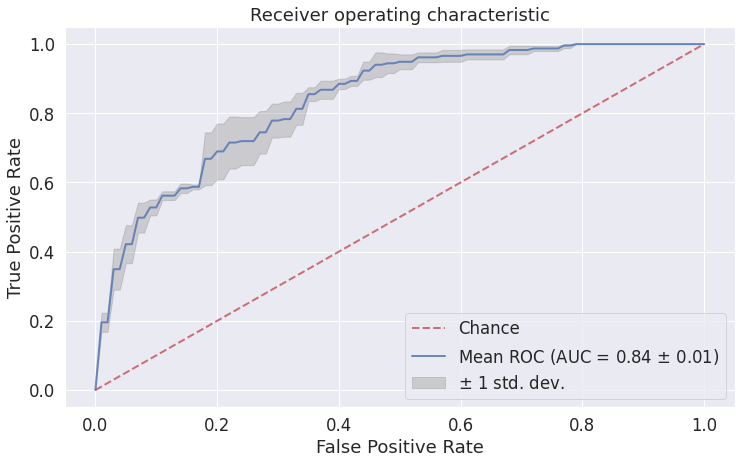

In [27]:
print("Mean Accuracy %0.2f\u00B1%0.2f)" % (np.mean(acc), np.std(acc)))
print("Mean Sensitivity %0.2f\u00B1%0.2f)" % (np.mean(sen), np.std(sen)))
print("Mean Specificity %0.2f\u00B1%0.2f)" % (np.mean(spec), np.std(spec)))
print("Mean PPV %0.2f\u00B1%0.2f)" % (np.mean(ppvs), np.std(ppvs)))
print("Mean NPV %0.2f\u00B1%0.2f)" % (np.mean(npvs), np.std(npvs)))

fig, ax = plt.subplots(figsize=(12,7))

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)

mean_auc = auc(base_fpr, mean_tprs)
std_auc = np.std(aucs)

ax.plot(
    base_fpr,
    mean_tprs,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std

ax.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3,label=r"$\pm$ 1 std. dev.",)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)

sns.set(font_scale=1.5)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
ax.legend(loc="lower right")
plt.show()
